In [394]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve

In [378]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [379]:
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import xgboost as xgb


In [405]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_set.csv')
df_ROS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_ROS.csv')
df_RUS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_RUS.csv')
df_SMOTE=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_SMOTE.csv')
df_cnn=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_cnn.csv')
df_test=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\test_set.csv')
df.head()
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
x_ov=df_ROS.iloc[:,:-1]
y_ov=df_ROS.iloc[:,-1]
x_under = df_RUS.iloc[:,:-1]
y_under=df_RUS.iloc[:,-1]
x_smote=df_SMOTE.iloc[:,:-1]
y_smote=df_SMOTE.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
x_cnn=df_cnn.iloc[:,:-1]
y_cnn=df_cnn.iloc[:,-1]
x_cnn_autoe=df_cnn.iloc[:,:-1]
y_cnn_autoe=df_cnn.iloc[:,-1]
accuracy_no_sampling=[]
accuracy_over_sampling=[]
accuracy_under_sampling=[]
accuracy_smote_sampling=[]
accuracy_cnn_sampling=[]
f1_no_sampling=[]
f1_over_sampling=[]
f1_under_sampling=[]
f1_smote_sampling=[]
f1_cnn_sampling=[]
precision_no_sampling=[]
precision_over_sampling=[]
precision_under_sampling=[]
precision_smote_sampling=[]
precision_cnn_sampling=[]
recall_no_sampling=[]
recall_over_sampling=[]
recall_under_sampling=[]
recall_smote_sampling=[]
recall_cnn_sampling=[]
roc_no_sampling=[]
roc_over_sampling=[]
#recall_under_sampling=[]
#recall_smote_sampling=[]
#recall_cnn_sampling=[]

In [99]:
df.shape

(21000, 24)

In [230]:
#plot graph to work out optimal for adaboost

def optimal_est(x_train, y_train, learnrate, estimators, x_test):
    accuracy_dict={}
    f1_dict={}
    precision_dict = {}
    recall_dict = {}
    for i in learnrate:
        accuracy_dict[i]=[]
        f1_dict[i]=[]
        precision_dict[i]=[]
        recall_dict[i]=[]
        for j in estimators:
            clf_ada = AdaBoostClassifier(n_estimators=j,learning_rate=i)
            clf_osamp_ada=clf_ada.fit(x_ov,y_ov)
            clf_osamp_prediction_ada=clf_osamp_ada.predict(x_test)
            clf_osamp_accuracy_ada=accuracy_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_f1_ada=f1_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_precision_ada=precision_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_recall_ada=recall_score(clf_osamp_prediction_ada,y_test)
            accuracy_dict[i].append(clf_osamp_accuracy_ada)
            f1_dict[i].append(clf_osamp_f1_ada)
            precision_dict[i].append(clf_osamp_precision_ada)
            recall_dict[i].append(clf_osamp_recall_ada)
       
        
        plt.plot(estimators,accuracy_dict[i])
        plt.title('accuracy graph learnrate = ' +str(i))
        #plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators, f1_dict[i])
        plt.title('f1 graph learnrate = ' +str(i))
        #plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators,recall_dict[i])
        plt.title('recall graph learnrate = ' +str(i))
        plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators, precision_dict[i])
        plt.title('precision graph learnrate = ' +str(i))
        plt.ylabel('estimators')
        plt.show()
    return accuracy_dict, f1_dict, precision_dict, recall_dict
    #plt.plot(learnrate,accuracy_list11)
    #plt.show()
    #plt.plot(learnrate,f1_list11)
    #plt.show()
    #plt.plot(learnrate,recall_list11)
    #plt.show()
    #plt.plot(learnrate, precision_list11)
    #plt.show()

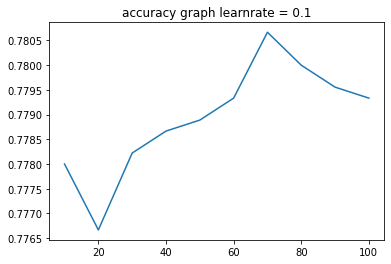

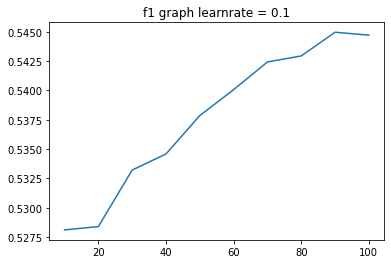

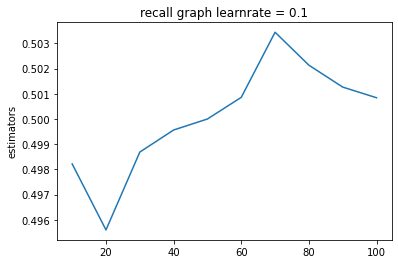

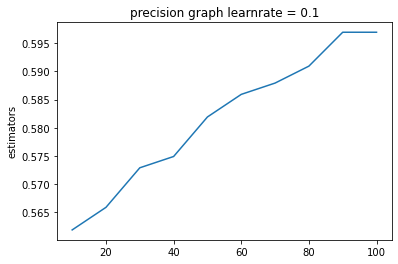

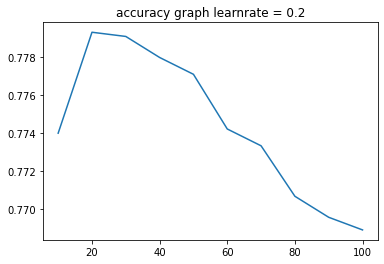

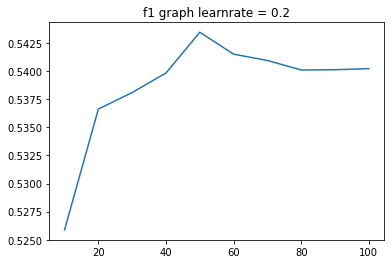

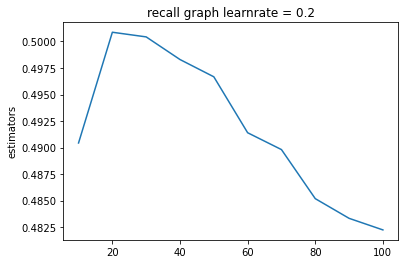

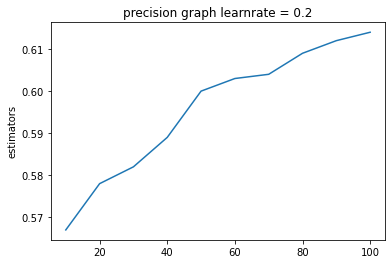

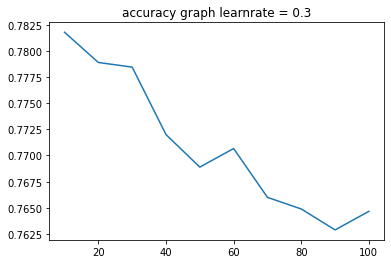

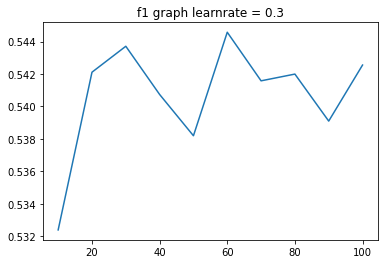

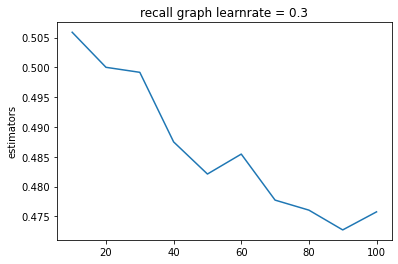

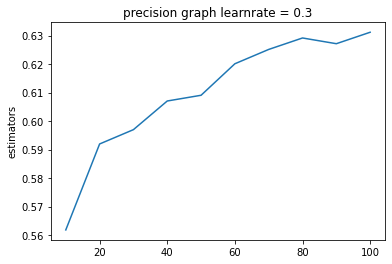

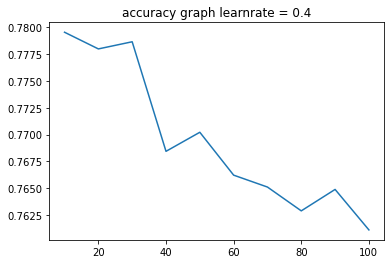

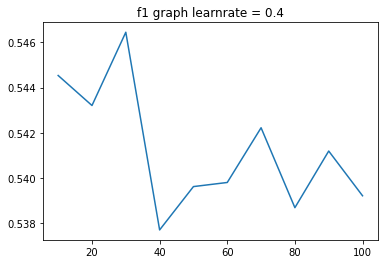

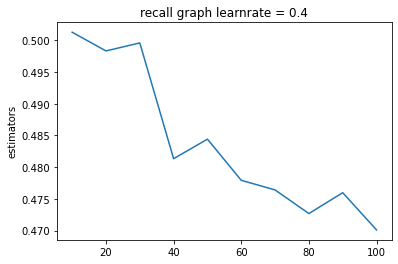

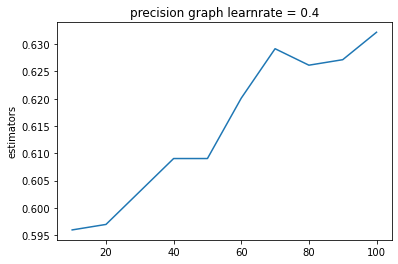

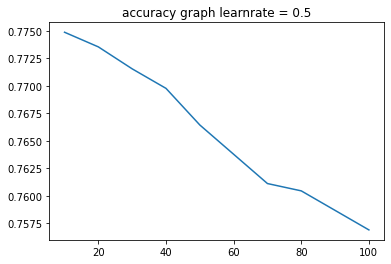

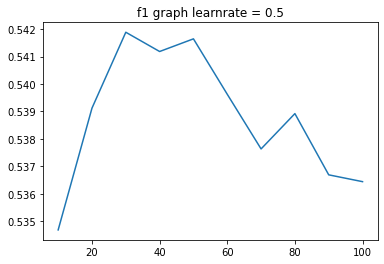

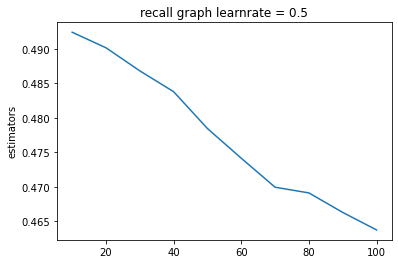

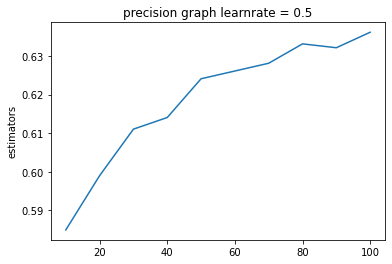

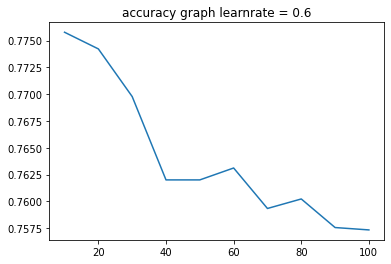

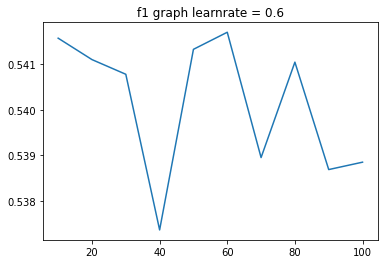

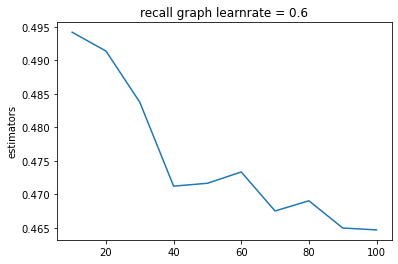

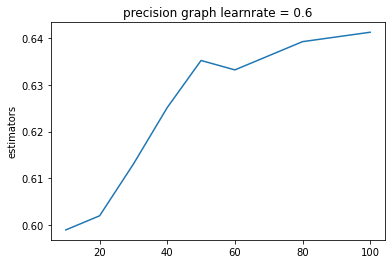

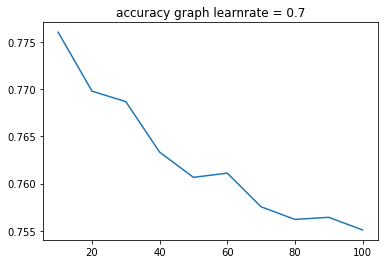

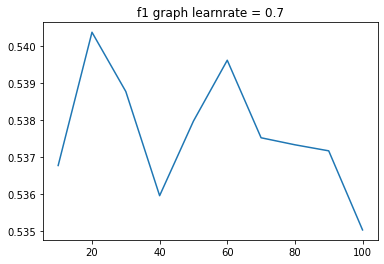

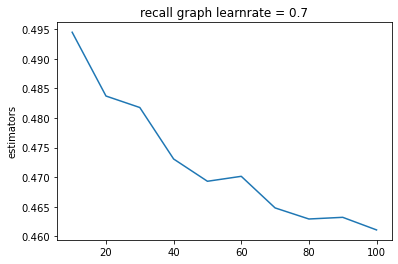

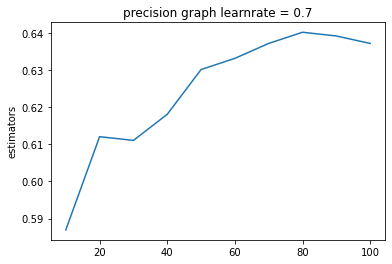

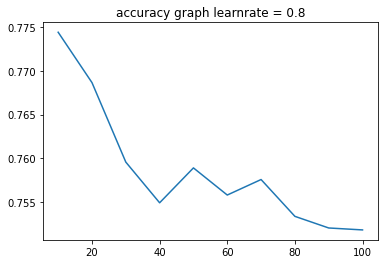

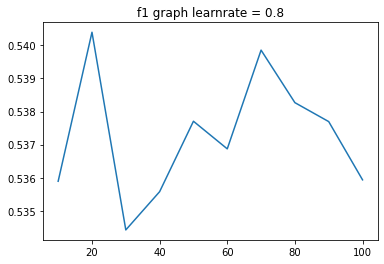

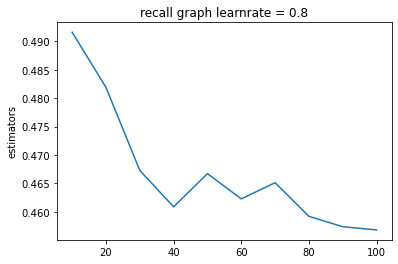

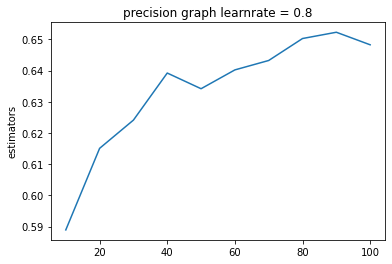

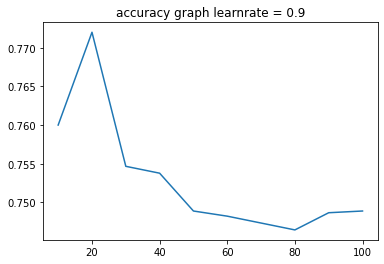

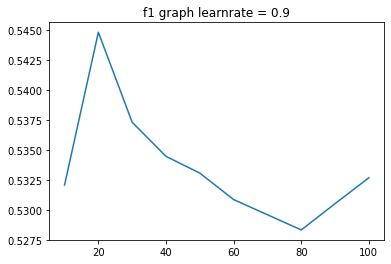

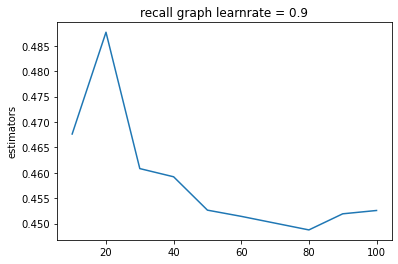

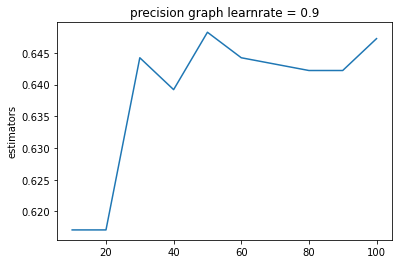

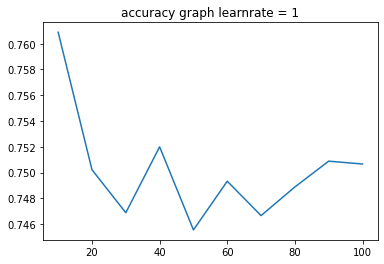

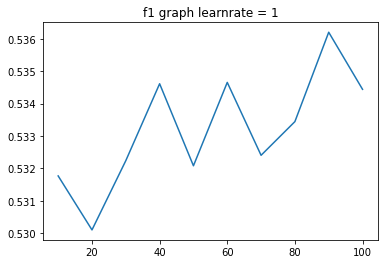

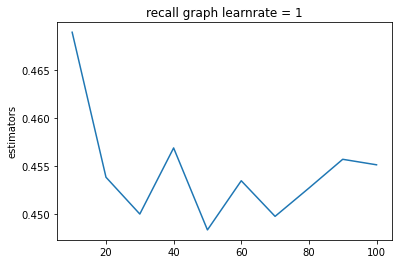

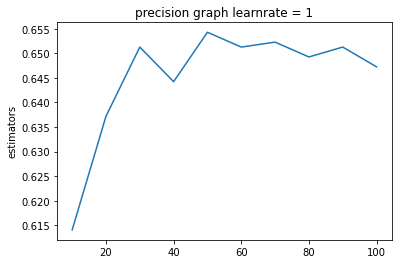

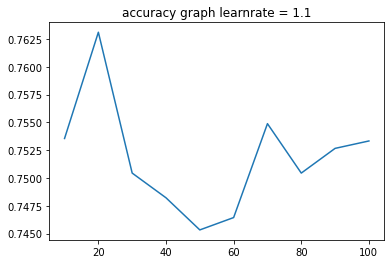

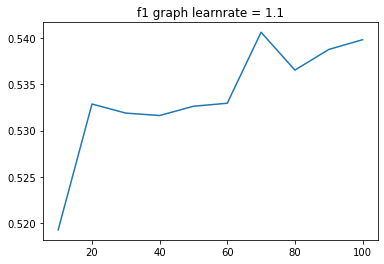

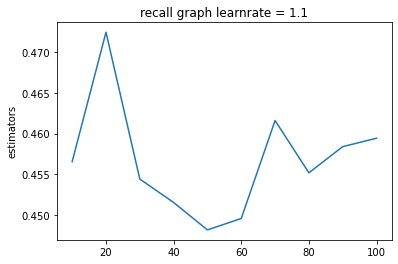

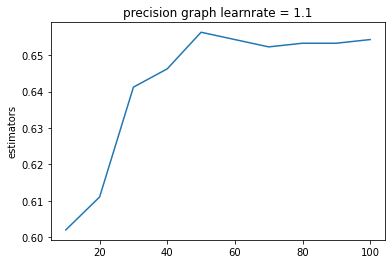

In [231]:
accuracy_dict, f1_dict, precision_dict, recall_dict=optimal_est(x_train,y_train,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1],[10,20,30,40,50,60,70,80,90,100],x_test)

In [253]:
#finds optimal 
learnrate1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
estimator1=[10,20,30,40,50,60,70,80,90,100]
print('best acc')
best_acc=0
nbest=0
mbest=0
for n in learnrate1:
    best_acc=best_acc
    for m in range(len(estimator1)):
        if accuracy_dict[n][m]>best_acc:
            best_acc = accuracy_dict[n][m]
            nbest=n
            mbest=estimator1[m]
        else:  
            continue
print(best_acc)
print(nbest,mbest)

print('best f1')
best_f1=0
nbestf1=0
mbestf1=0
for n in learnrate1:
    best_f1=best_f1
    for m in range(len(estimator1)):
        if f1_dict[n][m]>best_f1:
            best_f1 = f1_dict[n][m]
            nbestf1=n
            mbestf1=estimator1[m]
        else:  
            continue
print(best_f1)
print(nbestf1,mbestf1)

print('best recall')
best_recall=0
nbestrecall=0
mbestrecall=0
for n in learnrate1:
    best_recall=best_recall
    for m in range(len(estimator1)):
        if recall_dict[n][m]>best_recall:
            best_recall = recall_dict[n][m]
            nbestrecall=n
            mbestrecall=estimator1[m]
        else:  
            continue
print(best_recall)
print(nbestrecall,mbestrecall)

print('best precision')
best_precision=0
nbestprecision=0
mbestprecision=0
for n in learnrate1:
    best_precision=best_precision
    for m in range(len(estimator1)):
        if precision_dict[n][m]>best_precision:
            best_precision = precision_dict[n][m]
            nbestprecision=n
            mbestprecision=estimator1[m]
        else:  
            continue
print(best_precision)
print(nbestf1,mbestprecision)
    

best acc
0.7817777777777778
0.3 10
best f1
0.546448087431694
0.4 30
best recall
0.5058823529411764
0.3 10
best precision
0.6562814070351759
0.4 50


In [351]:
#plot graph to work out optimal for gradboost

def optimal_est(x_train, y_train, learnrate, estimators, x_test):
    accuracy_dict={}
    f1_dict={}
    precision_dict = {}
    recall_dict = {}
    for i in learnrate:
        accuracy_dict[i]=[]
        f1_dict[i]=[]
        precision_dict[i]=[]
        recall_dict[i]=[]
        for j in estimators:
            clf_ada = GradientBoostingClassifier(n_estimators=j,learning_rate=i)
            clf_osamp_ada=clf_ada.fit(x_ov,y_ov)
            clf_osamp_prediction_ada=clf_osamp_ada.predict(x_test)
            clf_osamp_accuracy_ada=accuracy_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_f1_ada=f1_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_precision_ada=precision_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_recall_ada=recall_score(clf_osamp_prediction_ada,y_test)
            accuracy_dict[i].append(clf_osamp_accuracy_ada)
            f1_dict[i].append(clf_osamp_f1_ada)
            precision_dict[i].append(clf_osamp_precision_ada)
            recall_dict[i].append(clf_osamp_recall_ada)
       
        
        plt.plot(estimators,accuracy_dict[i])
        plt.title('accuracy graph learnrate = ' +str(i))
        #plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators, f1_dict[i])
        plt.title('f1 graph learnrate = ' +str(i))
        #plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators,recall_dict[i])
        plt.title('recall graph learnrate = ' +str(i))
        plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators, precision_dict[i])
        plt.title('precision graph learnrate = ' +str(i))
        plt.ylabel('estimators')
        plt.show()
    return accuracy_dict, f1_dict, precision_dict, recall_dict

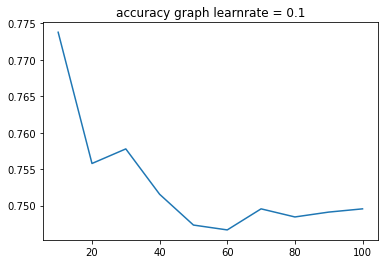

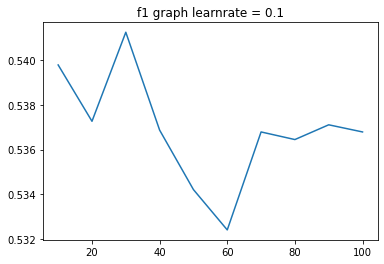

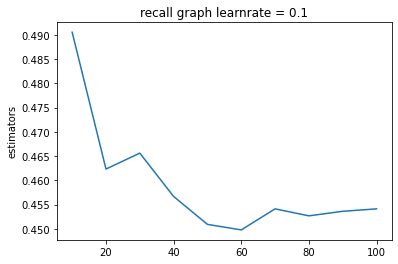

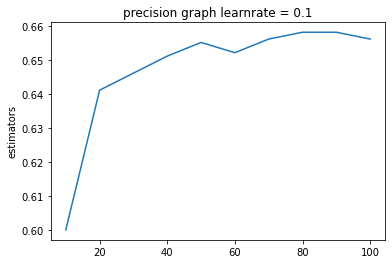

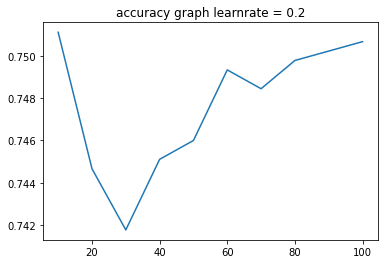

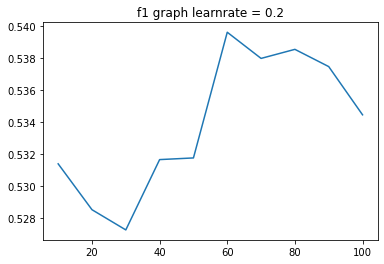

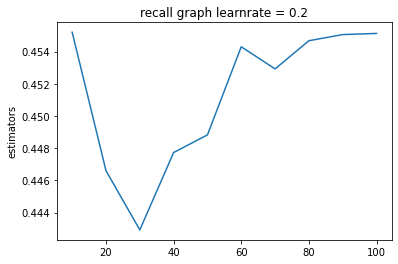

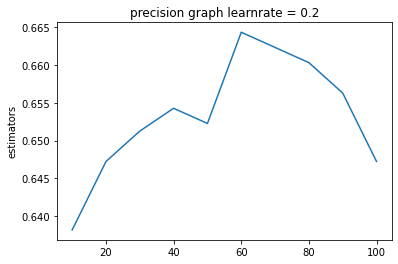

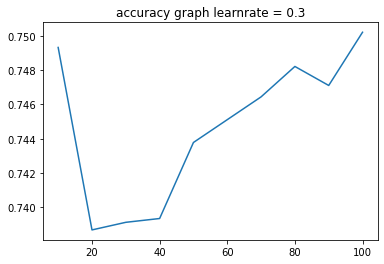

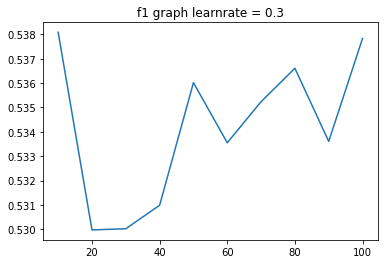

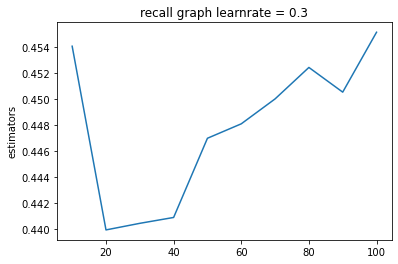

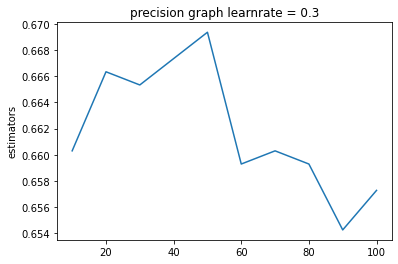

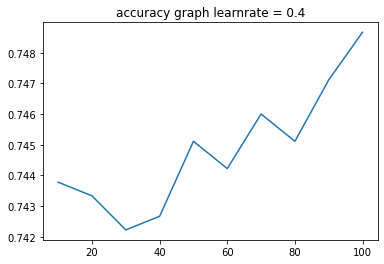

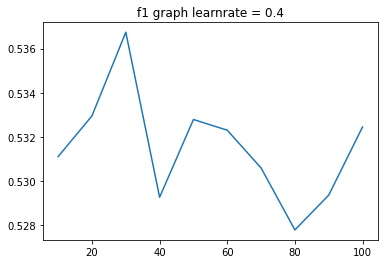

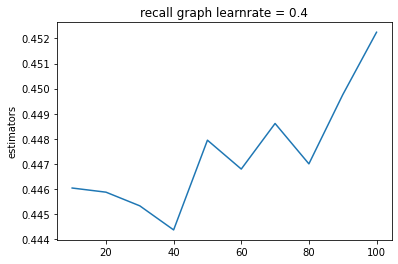

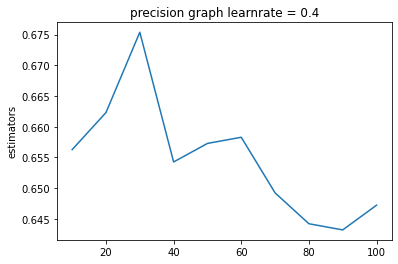

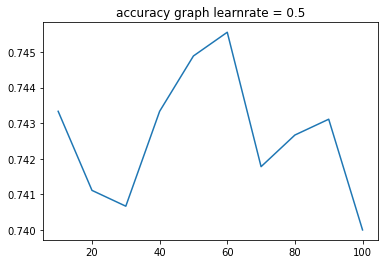

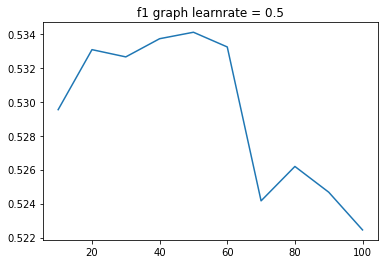

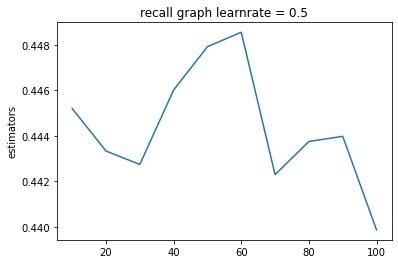

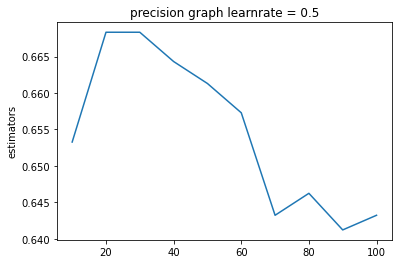

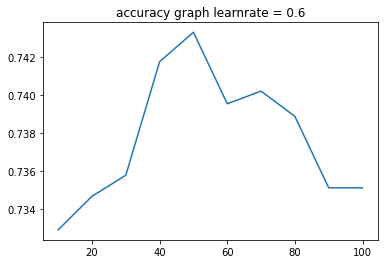

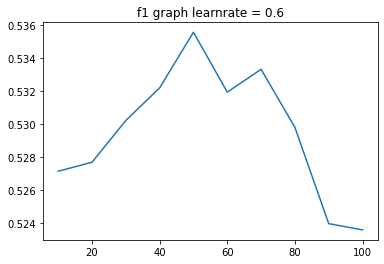

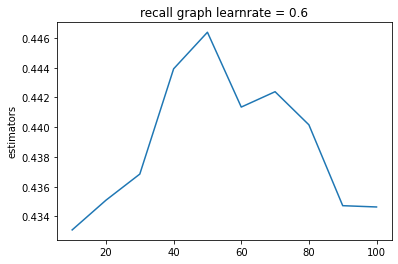

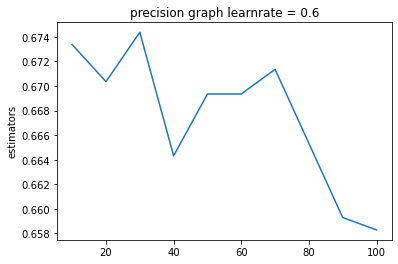

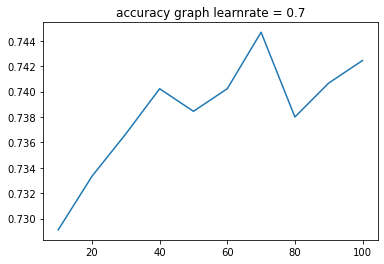

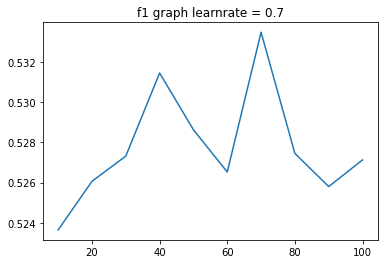

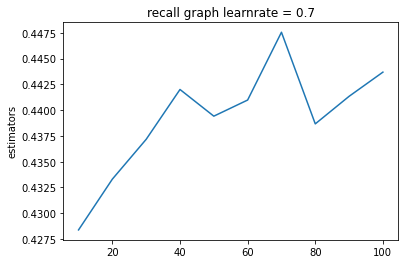

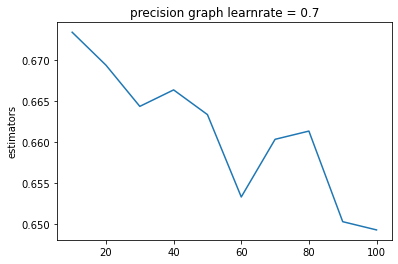

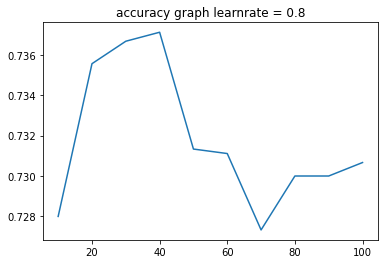

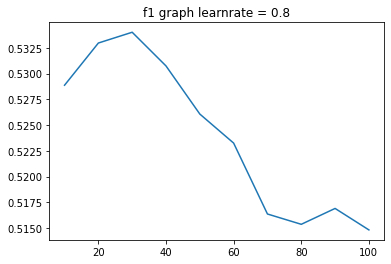

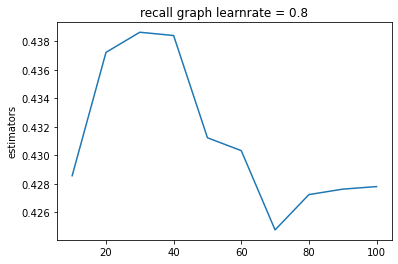

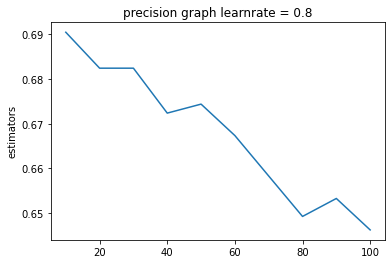

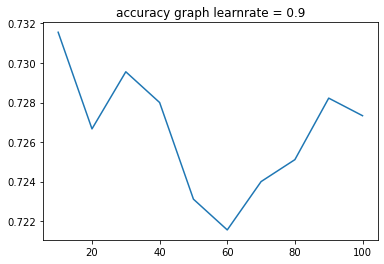

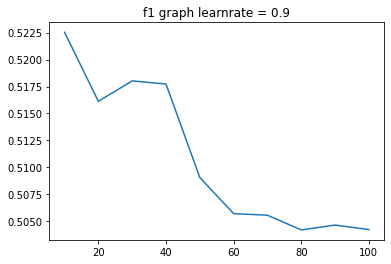

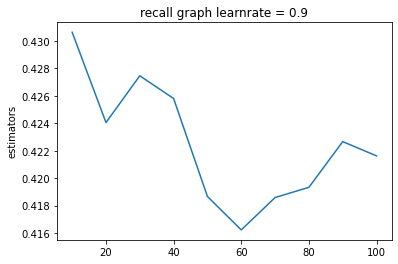

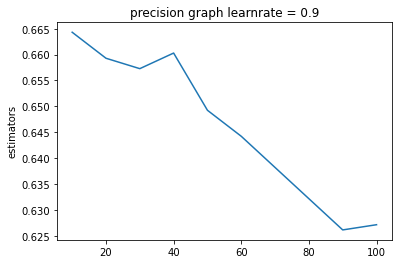

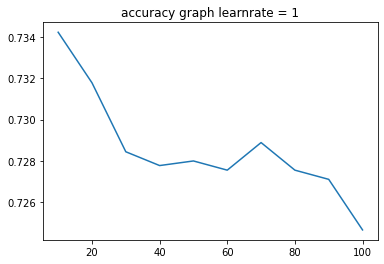

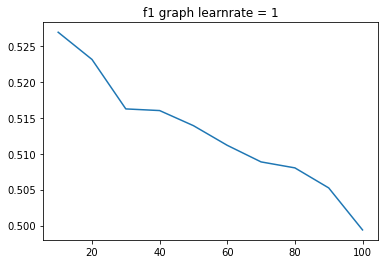

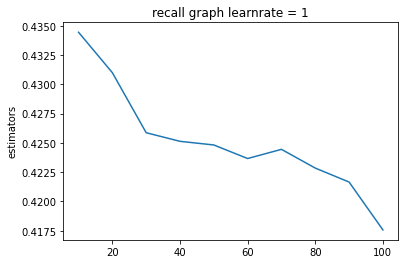

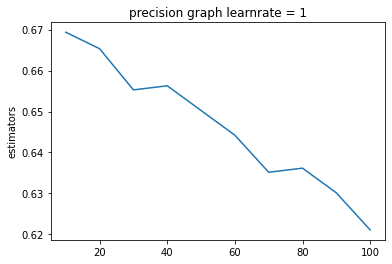

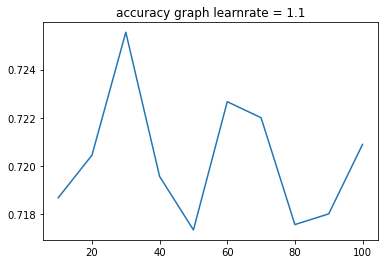

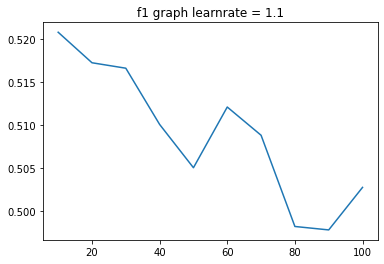

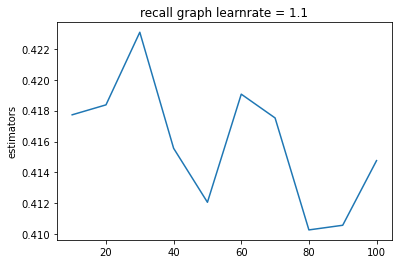

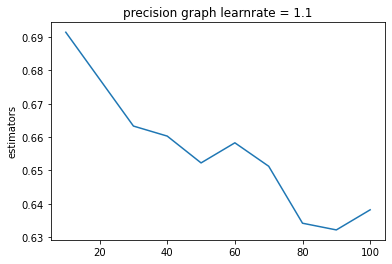

In [352]:
accuracy_dict, f1_dict, precision_dict, recall_dict=optimal_est(x_train,y_train,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1],[10,20,30,40,50,60,70,80,90,100],x_test)

In [ ]:
#finds optimal 
learnrate1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
estimator1=[10,20,30,40,50,60,70,80,90,100]
print('best acc')
best_acc=0
nbest=0
mbest=0
for n in learnrate1:
    best_acc=best_acc
    for m in range(len(estimator1)):
        if accuracy_dict[n][m]>best_acc:
            best_acc = accuracy_dict[n][m]
            nbest=n
            mbest=estimator1[m]
        else:  
            continue
print(best_acc)
print(nbest,mbest)

print('best f1')
best_f1=0
nbestf1=0
mbestf1=0
for n in learnrate1:
    best_f1=best_f1
    for m in range(len(estimator1)):
        if f1_dict[n][m]>best_f1:
            best_f1 = f1_dict[n][m]
            nbestf1=n
            mbestf1=estimator1[m]
        else:  
            continue
print(best_f1)
print(nbestf1,mbestf1)

print('best recall')
best_recall=0
nbestrecall=0
mbestrecall=0
for n in learnrate1:
    best_recall=best_recall
    for m in range(len(estimator1)):
        if recall_dict[n][m]>best_recall:
            best_recall = recall_dict[n][m]
            nbestrecall=n
            mbestrecall=estimator1[m]
        else:  
            continue
print(best_recall)
print(nbestrecall,mbestrecall)

print('best precision')
best_precision=0
nbestprecision=0
mbestprecision=0
for n in learnrate1:
    best_precision=best_precision
    for m in range(len(estimator1)):
        if precision_dict[n][m]>best_precision:
            best_precision = precision_dict[n][m]
            nbestprecision=n
            mbestprecision=estimator1[m]
        else:  
            continue
print(best_precision)
print(nbestf1,mbestprecision)

In [ ]:
#check the model isnt overfitting
ada_nosamp=ada.fit(x_train,y_train)
ada_nosamp_prediction=ada_nosamp.predict(x_test)
trainingpred=ada_nosamp.predict(x_train)
recall12= recall_score(trainingpred, y_train)
recall123=recall_score(ada_nosamp_prediction,y_test)
recall_scores=[recall12,recall123]
names12=['training set','test set']
plt.bar(names12, recall_scores)
plt.show()

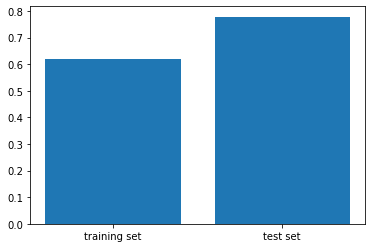

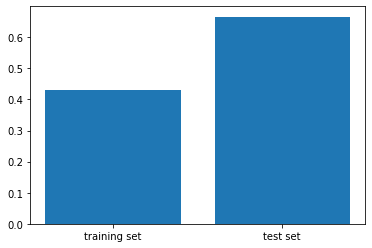

In [256]:
#undersamp overfit
clf_undersamp=clf.fit(x_under,y_under)
clf_undersamp_prediction=clf_undersamp.predict(x_test)
clf_undersamp_prediction1=clf_undersamp.predict(x_train)
clf_undersamp_accuracy=accuracy_score(clf_undersamp_prediction,y_test)
clf_undersamp_accuracy1=accuracy_score(clf_undersamp_prediction1,y_train)
clf_undersamp_f1=f1_score(clf_undersamp_prediction,y_test)
clf_undersamp_f11=f1_score(clf_undersamp_prediction1,y_train)
#clf_undersamp_fbeta=fbeta_score(clf_undersamp_prediction,y_test,beta=0.8)
clf_undersampacc=[clf_undersamp_accuracy,clf_undersamp_accuracy1]
clf_undersampf1=[clf_undersamp_f1,clf_undersamp_f11]
names12clf_undersamp=['training set','test set']
plt.bar(names12clf_undersamp, clf_undersampacc)
plt.show()
plt.bar(names12clf_undersamp, clf_undersampf1)
plt.show()
#my decision tree is massivly underfitting


In [380]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from xgboost import XGBClassifier
gbc = XGBClassifier()

In [ ]:
#we first find the optimal number of trees in the random forest (TAKES AGES TO RUN) and from the results choose 100 also not sure why zigzag
def optimal_trees(x_train, y_train, array, x_test):
    accuracy_list =[]
    f1_list=[]
    for i in array:
        rfc =ensemble.RandomForestClassifier(n_estimators=i)
        rfc_nosamp=rfc.fit(x_train,y_train)
        rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
        rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
        accuracy_list.append(rfc_nosamp_accuracy)
        f1_list.append(rfc_nosamp_f1)
    print(accuracy_list,f1_list)
    plt.plot(array, accuracy_list)
    plt.xlabel('no_of_tres')
    plt.ylabel('score')
    plt.show()
    plt.plot(array, f1_list)
    plt.show()
    return('hi')
 

In [ ]:
optimal_trees(x_train,y_train,[30,40,50,60,70,80,90,100,110,120,130,140,150,160],x_test)

In [406]:
#use graphs to decide learning rate and n_est of ada
clf =tree.DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=30,learning_rate=0.4)
rfc =ensemble.RandomForestClassifier(n_estimators=100)
gbc=GradientBoostingClassifier()

In [407]:
#nosampling decsiion tree
clf_nosamp=clf.fit(x_train,y_train)
clf_nosamp_prediction=clf_nosamp.predict(x_test)
clf_nosamp_accuracy=accuracy_score(clf_nosamp_prediction,y_test)
clf_nosamp_f1=f1_score(clf_nosamp_prediction,y_test)
clf_nosamp_precision=precision_score(clf_nosamp_prediction,y_test)
clf_nosamp_recall=recall_score(clf_nosamp_prediction,y_test)
clf_nosamp_roc=roc_auc_score(clf_nosamp_prediction,y_test)
accuracy_no_sampling.append(clf_nosamp_accuracy)
f1_no_sampling.append(clf_nosamp_f1)
precision_no_sampling.append(clf_nosamp_precision)
recall_no_sampling.append(clf_nosamp_recall)
roc_no_sampling.append(clf_nosamp_roc)
print(f1_no_sampling)

[0.4011272898074213]


In [397]:
clf_nosamp_roc=roc_auc_score(clf_nosamp_prediction,y_test)
print(clf_nosamp_roc)

0.6055589696317919


In [408]:
#nosampling decsiion tree adaboost
ada_nosamp=ada.fit(x_train,y_train)
ada_nosamp_prediction=ada_nosamp.predict(x_test)
ada_nosamp_accuracy=accuracy_score(ada_nosamp_prediction,y_test)
ada_nosamp_f1=f1_score(ada_nosamp_prediction,y_test)
ada_nosamp_precision=precision_score(ada_nosamp_prediction,y_test)
ada_nosamp_recall=recall_score(ada_nosamp_prediction,y_test)
ada_nosamp_roc=roc_auc_score(ada_nosamp_prediction,y_test)
#ada_nosamp=[ada_nosamp_accuracy,ada_nosamp_f1]
accuracy_no_sampling.append(ada_nosamp_accuracy)
f1_no_sampling.append(ada_nosamp_f1)
precision_no_sampling.append(ada_nosamp_precision)
recall_no_sampling.append(ada_nosamp_recall)
print(accuracy_no_sampling,ada_nosamp_f1)
roc_no_sampling.append(ada_nosamp_roc)


[0.7166666666666667, 0.8208888888888889] 0.4531886024423337


In [409]:
#nosampling gradboost
gbc_nosamp=gbc.fit(x_train,y_train)
gbc_nosamp_prediction=gbc_nosamp.predict(x_test)
gbc_nosamp_accuracy=accuracy_score(gbc_nosamp_prediction,y_test)
gbc_nosamp_f1=f1_score(gbc_nosamp_prediction,y_test)
gbc_nosamp_precision=precision_score(gbc_nosamp_prediction,y_test)
gbc_nosamp_recall=recall_score(gbc_nosamp_prediction,y_test)
gbc_nosamp_roc=roc_auc_score(gbc_nosamp_prediction,y_test)
#ada_nosamp=[ada_nosamp_accuracy,ada_nosamp_f1]
accuracy_no_sampling.append(gbc_nosamp_accuracy)
f1_no_sampling.append(gbc_nosamp_f1)
precision_no_sampling.append(gbc_nosamp_precision)
recall_no_sampling.append(gbc_nosamp_recall)
roc_no_sampling.append(gbc_nosamp_roc)
print(accuracy_no_sampling,gbc_nosamp_f1)

[0.7166666666666667, 0.8208888888888889, 0.8248888888888889] 0.49422336328626454


In [410]:
#rfc nosampling
rfc_nosamp=rfc.fit(x_train,y_train)
rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_precision=precision_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_recall=recall_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_roc=roc_auc_score(rfc_nosamp_prediction,y_test)
#rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
#rfc_nosamp=[rfc_nosamp_scores]
accuracy_no_sampling.append(rfc_nosamp_accuracy)
f1_no_sampling.append(rfc_nosamp_f1)
precision_no_sampling.append(rfc_nosamp_precision)
recall_no_sampling.append(rfc_nosamp_recall)
roc_no_sampling.append(rfc_nosamp_roc)

In [411]:
#oversampling dec tree
#now we make the decision tree with our new smaples
clf_oversamp=clf.fit(x_ov,y_ov)
clf_oversamp_prediction=clf_oversamp.predict(x_test)
clf_oversamp_accuracy=accuracy_score(clf_oversamp_prediction,y_test)
clf_oversamp_f1=f1_score(clf_oversamp_prediction,y_test)
clf_oversamp_precision=precision_score(clf_oversamp_prediction,y_test)
clf_oversamp_roc=roc_auc_score(clf_oversamp_prediction,y_test)
clf_oversamp_recall=recall_score(clf_oversamp_prediction,y_test)
#clf_oversamp=[oversamp_accuracy,oversamp_f1]
accuracy_over_sampling.append(clf_oversamp_accuracy)
f1_over_sampling.append(clf_oversamp_f1)
precision_over_sampling.append(clf_oversamp_precision)
recall_over_sampling.append(clf_oversamp_recall)
roc_over_sampling.append(clf_oversamp_roc)

In [412]:
########################################
#oversampling ada 
ada_oversamp=ada.fit(x_ov,y_ov)
ada_oversamp_prediction=ada_oversamp.predict(x_test)
ada_oversamp_accuracy=accuracy_score(ada_oversamp_prediction,y_test)
ada_oversamp_f1=f1_score(ada_oversamp_prediction,y_test)
ada_oversamp_precision=precision_score(ada_oversamp_prediction,y_test)
ada_oversamp_recall=recall_score(ada_oversamp_prediction,y_test)
ada_oversamp_roc=roc_auc_score(ada_oversamp_prediction,y_test)
#ada_oversamp=[ada_oversamp_accuracy,ada_oversamp_f1]
accuracy_over_sampling.append(ada_oversamp_accuracy)
f1_over_sampling.append(ada_oversamp_f1)
precision_over_sampling.append(ada_oversamp_precision)
recall_over_sampling.append(ada_oversamp_recall)
roc_over_sampling.append(ada_oversamp_roc)
print(ada_oversamp_accuracy,ada_oversamp_f1)

0.7786666666666666 0.546448087431694


In [413]:
#oversampling gbc
gbc_oversamp=gbc.fit(x_ov,y_ov)
gbc_oversamp_prediction=gbc_oversamp.predict(x_test)
gbc_oversamp_accuracy=accuracy_score(gbc_oversamp_prediction,y_test)
gbc_oversamp_f1=f1_score(gbc_oversamp_prediction,y_test)
gbc_oversamp_precision=precision_score(gbc_oversamp_prediction,y_test)
gbc_oversamp_recall=recall_score(gbc_oversamp_prediction,y_test)
gbc_oversamp_roc=roc_auc_score(gbc_oversamp_prediction,y_test)
#ada_oversamp=[ada_oversamp_accuracy,ada_oversamp_f1]
accuracy_over_sampling.append(gbc_oversamp_accuracy)
f1_over_sampling.append(gbc_oversamp_f1)
precision_over_sampling.append(gbc_oversamp_precision)
recall_over_sampling.append(gbc_oversamp_recall)
roc_over_sampling.append(gbc_oversamp_roc)
print(gbc_oversamp_accuracy,gbc_oversamp_f1)

0.7495555555555555 0.5367858610768598


In [414]:
#rfc oversampling
#now we make the decision tree with our new smaples
rfc_oversamp=rfc.fit(x_ov,y_ov)
rfc_oversamp_prediction=rfc_oversamp.predict(x_test)
rfc_oversamp_accuracy=accuracy_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_f1=f1_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_precision=precision_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_roc=roc_auc_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_recall=recall_score(rfc_oversamp_prediction,y_test)
#rfc_oversamp=[rfc_oversamp_accuracy,rfc_oversamp_f1]
accuracy_over_sampling.append(rfc_oversamp_accuracy)
f1_over_sampling.append(rfc_oversamp_f1)
precision_over_sampling.append(rfc_oversamp_precision)
roc_over_sampling.append(rfc_oversamp_roc)
recall_over_sampling.append(rfc_oversamp_recall)

In [331]:
#undersampling dectree
clf_undersamp=clf.fit(x_under,y_under)
clf_undersamp_prediction=clf_undersamp.predict(x_test)
clf_undersamp_accuracy=accuracy_score(clf_undersamp_prediction,y_test)
clf_undersamp_f1=f1_score(clf_undersamp_prediction,y_test)
clf_undersamp_precision=precision_score(clf_undersamp_prediction,y_test)
clf_undersamp_recall=recall_score(clf_undersamp_prediction,y_test)
#clf_undersamp=[clf_undersamp_accuracy,clf_undersamp_f1]
accuracy_under_sampling.append(clf_undersamp_accuracy)
f1_under_sampling.append(clf_undersamp_f1)
precision_under_sampling.append(clf_undersamp_precision)
recall_under_sampling.append(clf_undersamp_recall)

In [332]:
#undersampling ada
ada_undersamp=ada.fit(x_under,y_under)
ada_undersamp_prediction=ada_undersamp.predict(x_test)
ada_undersamp_accuracy=accuracy_score(ada_undersamp_prediction,y_test)
ada_undersamp_f1=f1_score(ada_undersamp_prediction,y_test)
ada_undersamp_precision=precision_score(ada_undersamp_prediction,y_test)
ada_undersamp_recall=recall_score(ada_undersamp_prediction,y_test)
#ada_undersamp=[ada_undersamp_accuracy,ada_undersamp_f1]
accuracy_under_sampling.append(ada_undersamp_accuracy)
f1_under_sampling.append(ada_undersamp_f1)
precision_under_sampling.append(ada_undersamp_precision)
recall_under_sampling.append(ada_undersamp_recall)

In [333]:
#undersampling gbc
gbc_undersamp=gbc.fit(x_under,y_under)
gbc_undersamp_prediction=gbc_undersamp.predict(x_test)
gbc_undersamp_accuracy=accuracy_score(gbc_undersamp_prediction,y_test)
gbc_undersamp_f1=f1_score(gbc_undersamp_prediction,y_test)
gbc_undersamp_precision=precision_score(gbc_undersamp_prediction,y_test)
gbc_undersamp_recall=recall_score(gbc_undersamp_prediction,y_test)
#ada_undersamp=[ada_undersamp_accuracy,ada_undersamp_f1]
accuracy_under_sampling.append(gbc_undersamp_accuracy)
f1_under_sampling.append(gbc_undersamp_f1)
precision_under_sampling.append(gbc_undersamp_precision)
recall_under_sampling.append(gbc_undersamp_recall)

In [334]:
#rfc undersampling
#now we make the decision tree with our new smaples
undersamp_rfc=rfc.fit(x_under,y_under)
rfc_undersamp_prediction=undersamp_rfc.predict(x_test)
rfc_undersamp_accuracy=accuracy_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_f1=f1_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_precision=precision_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_recall=recall_score(rfc_undersamp_prediction,y_test)
#rfc_undersamp=[rfc_undersamp_accuracy, rfc_undersamp_f1]
accuracy_under_sampling.append(rfc_undersamp_accuracy)
f1_under_sampling.append(rfc_undersamp_f1)
precision_under_sampling.append(rfc_undersamp_precision)
recall_under_sampling.append(rfc_undersamp_recall)

In [335]:
#smote sampling dectree
clf_oversamp_smote=clf.fit(x_smote,y_smote)
clf_oversamp_smote_prediction=clf_oversamp_smote.predict(x_test)
clf_oversamp_smote_accuracy=accuracy_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_f1=f1_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_precision=precision_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_recall=recall_score(clf_oversamp_smote_prediction,y_test)
#clf_smote=[oversamp_smote_accuracy,oversamp_smote_f1]
accuracy_smote_sampling.append(clf_oversamp_smote_accuracy)
f1_smote_sampling.append(clf_oversamp_smote_f1)
precision_smote_sampling.append(clf_oversamp_smote_precision)
recall_smote_sampling.append(clf_oversamp_smote_recall)

In [336]:
#smote sampling ada
ada_oversamp_smote=ada.fit(x_smote,y_smote)
ada_oversamp_smote_prediction=ada_oversamp_smote.predict(x_test)
ada_oversamp_smote_accuracy=accuracy_score(ada_oversamp_smote_prediction,y_test)
ada_oversamp_smote_f1=f1_score(ada_oversamp_smote_prediction,y_test)
ada_oversamp_smote_precision=precision_score(ada_oversamp_smote_prediction,y_test)
ada_oversamp_smote_recall=recall_score(ada_oversamp_smote_prediction,y_test)
#ada_smote=[ada_oversamp_smote_accuracy,ada_oversamp_smote_f1]
accuracy_smote_sampling.append(ada_oversamp_smote_accuracy)
f1_smote_sampling.append(ada_oversamp_smote_f1)
precision_smote_sampling.append(ada_oversamp_smote_precision)
recall_smote_sampling.append(ada_oversamp_smote_recall)

In [337]:
#smote sampling gbc
gbc_oversamp_smote=gbc.fit(x_smote,y_smote)
gbc_oversamp_smote_prediction=gbc_oversamp_smote.predict(x_test)
gbc_oversamp_smote_accuracy=accuracy_score(gbc_oversamp_smote_prediction,y_test)
gbc_oversamp_smote_f1=f1_score(gbc_oversamp_smote_prediction,y_test)
gbc_oversamp_smote_precision=precision_score(gbc_oversamp_smote_prediction,y_test)
gbc_oversamp_smote_recall=recall_score(gbc_oversamp_smote_prediction,y_test)
#ada_smote=[ada_oversamp_smote_accuracy,ada_oversamp_smote_f1]
accuracy_smote_sampling.append(gbc_oversamp_smote_accuracy)
f1_smote_sampling.append(gbc_oversamp_smote_f1)
precision_smote_sampling.append(gbc_oversamp_smote_precision)
recall_smote_sampling.append(gbc_oversamp_smote_recall)

In [338]:
#smote rfc
rfc_oversamp_smote=rfc.fit(x_smote,y_smote)
rfc_oversamp_smote_prediction=rfc_oversamp_smote.predict(x_test)
rfc_oversamp_smote_accuracy=accuracy_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_f1=f1_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_precision=precision_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_recall=recall_score(rfc_oversamp_smote_prediction,y_test)
#rfc_smote=[rfc_oversamp_smote_accuracy, rfc_oversamp_smote_f1]
accuracy_smote_sampling.append(rfc_oversamp_smote_accuracy)
f1_smote_sampling.append(rfc_oversamp_smote_f1)
precision_smote_sampling.append(rfc_oversamp_smote_precision)
recall_smote_sampling.append(rfc_oversamp_smote_recall)

In [339]:
#cnn sampling dectree 
clf_oversamp_cnn=clf.fit(x_cnn,y_cnn)
clf_oversamp_cnn_prediction=clf_oversamp_cnn.predict(x_test)
clf_oversamp_cnn_accuracy=accuracy_score(clf_oversamp_cnn_prediction,y_test)
clf_oversamp_cnn_f1=f1_score(clf_oversamp_cnn_prediction,y_test)
clf_oversamp_cnn_recall=recall_score(clf_oversamp_cnn_prediction,y_test)
clf_oversamp_cnn_precision=precision_score(clf_oversamp_cnn_prediction,y_test)
#clf_cnn=[oversamp_smote_accuracy,oversamp_cnn_f1]
accuracy_cnn_sampling.append(clf_oversamp_cnn_accuracy)
f1_cnn_sampling.append(clf_oversamp_cnn_f1)
recall_cnn_sampling.append(clf_oversamp_cnn_recall)
precision_cnn_sampling.append(clf_oversamp_cnn_precision)

In [340]:
#cnn sampling ada
ada_oversamp_cnn=ada.fit(x_cnn,y_cnn)
ada_oversamp_cnn_prediction=ada_oversamp_cnn.predict(x_test)
ada_oversamp_cnn_accuracy=accuracy_score(ada_oversamp_cnn_prediction,y_test)
ada_oversamp_cnn_f1=f1_score(ada_oversamp_cnn_prediction,y_test)
ada_oversamp_cnn_precision=precision_score(ada_oversamp_cnn_prediction,y_test)
ada_oversamp_cnn_recall=recall_score(ada_oversamp_cnn_prediction,y_test)
#ada_smote=[ada_oversamp_smote_accuracy,ada_oversamp_smote_f1]
accuracy_cnn_sampling.append(ada_oversamp_cnn_accuracy)
f1_cnn_sampling.append(ada_oversamp_cnn_f1)
precision_cnn_sampling.append(ada_oversamp_cnn_precision)
recall_cnn_sampling.append(ada_oversamp_cnn_recall)

In [341]:
#cnn sampling gbc
gbc_oversamp_cnn=gbc.fit(x_cnn,y_cnn)
gbc_oversamp_cnn_prediction=gbc_oversamp_cnn.predict(x_test)
gbc_oversamp_cnn_accuracy=accuracy_score(gbc_oversamp_cnn_prediction,y_test)
gbc_oversamp_cnn_f1=f1_score(gbc_oversamp_cnn_prediction,y_test)
gbc_oversamp_cnn_precision=precision_score(gbc_oversamp_cnn_prediction,y_test)
gbc_oversamp_cnn_recall=recall_score(gbc_oversamp_cnn_prediction,y_test)
#ada_smote=[ada_oversamp_smote_accuracy,ada_oversamp_smote_f1]
accuracy_cnn_sampling.append(gbc_oversamp_cnn_accuracy)
f1_cnn_sampling.append(gbc_oversamp_cnn_f1)
precision_cnn_sampling.append(gbc_oversamp_cnn_precision)
recall_cnn_sampling.append(gbc_oversamp_cnn_recall)

In [342]:
#rfc cnn
rfc_oversamp_cnn=rfc.fit(x_cnn,y_cnn)
rfc_oversamp_cnn_prediction=rfc_oversamp_cnn.predict(x_test)
rfc_oversamp_cnn_accuracy=accuracy_score(rfc_oversamp_cnn_prediction,y_test)
rfc_oversamp_cnn_f1=f1_score(rfc_oversamp_cnn_prediction,y_test)
rfc_oversamp_cnn_precision=precision_score(rfc_oversamp_cnn_prediction,y_test)
rfc_oversamp_cnn_recall=recall_score(rfc_oversamp_cnn_prediction,y_test)
#rfc_smote=[rfc_oversamp_smote_accuracy, rfc_oversamp_smote_f1]
accuracy_cnn_sampling.append(rfc_oversamp_cnn_accuracy)
f1_cnn_sampling.append(rfc_oversamp_cnn_f1)
precision_cnn_sampling.append(rfc_oversamp_cnn_precision)
recall_cnn_sampling.append(rfc_oversamp_cnn_recall)

In [343]:
accuracy_no_sampling
accuracy_over_sampling
accuracy_under_sampling
accuracy_smote_sampling
f1_no_sampling
f1_over_sampling
f1_under_sampling
f1_smote_sampling

[0.41511072514112024,
 0.5422138836772982,
 0.5160949868073879,
 0.5167820990942995]

In [344]:
print('accuracy')
print(accuracy_no_sampling)
print(accuracy_over_sampling)
print(accuracy_under_sampling)
print(accuracy_smote_sampling)
print(accuracy_cnn_sampling)
print('f1')
print(f1_no_sampling)
print(f1_over_sampling)
print(f1_under_sampling)
print(f1_smote_sampling)
print(f1_cnn_sampling)
print(' prec')
print(precision_no_sampling)
print(precision_over_sampling)
print(precision_under_sampling)
print(precision_smote_sampling)
print(precision_cnn_sampling)
print('recall')
print(recall_no_sampling)
print(recall_over_sampling)
print(recall_under_sampling)
print(recall_smote_sampling)
print(recall_cnn_sampling)


accuracy
[0.7202222222222222, 0.8208888888888889, 0.8246666666666667, 0.8188888888888889]
[0.7293333333333333, 0.7786666666666666, 0.7495555555555555, 0.8133333333333334]
[0.6204444444444445, 0.7637777777777778, 0.7431111111111111, 0.7328888888888889]
[0.7006666666666667, 0.7831111111111111, 0.7962222222222223, 0.7984444444444444]
[0.6155555555555555, 0.8022222222222222, 0.798, 0.7737777777777778]
f1
[0.40019056693663657, 0.4531886024423337, 0.4932562620423892, 0.4858044164037855]
[0.39702970297029705, 0.546448087431694, 0.5367858610768598, 0.5189003436426117]
[0.4333112143331122, 0.5327472527472528, 0.5323624595469256, 0.5263987391646966]
[0.41511072514112024, 0.5422138836772982, 0.5160949868073879, 0.5167820990942995]
[0.3899858956276446, 0.5440573770491803, 0.5502226620484908, 0.5260707635009311]
 prec
[0.4221105527638191, 0.335678391959799, 0.385929648241206, 0.3869346733668342]
[0.4030150753768844, 0.6030150753768844, 0.6562814070351759, 0.4552763819095477]
[0.6562814070351759, 0.

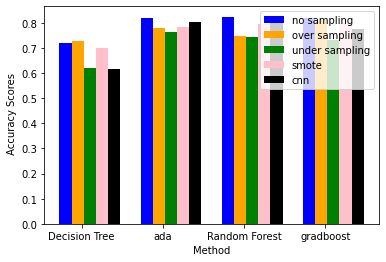

In [345]:
methods=['Decision Tree','ada','Random Forest','gradboost']
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(4)
width=0.15

plt.bar(x-0.2, accuracy_no_sampling, width,color='blue')
plt.bar(x-0.05, accuracy_over_sampling, width,color ='orange')
plt.bar(x+0.1, accuracy_under_sampling,width,color='green')
plt.bar(x+0.25, accuracy_smote_sampling, width,color='pink')
plt.bar(x+0.4, accuracy_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' Accuracy Scores')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()



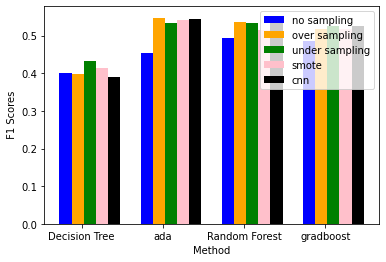

In [348]:
methods=['Decision Tree','ada','Random Forest','gradboost']
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(4)
width=0.15

plt.bar(x-0.2, f1_no_sampling, width,color='blue')
plt.bar(x-0.05, f1_over_sampling, width,color ='orange')
plt.bar(x+0.1, f1_under_sampling,width,color='green')
plt.bar(x+0.25, f1_smote_sampling, width,color='pink')
plt.bar(x+0.4, f1_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' F1 Scores')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()

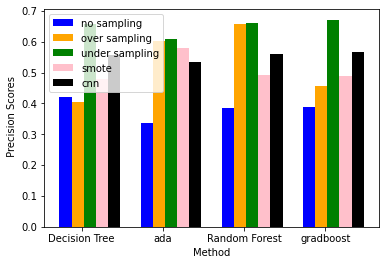

In [349]:
methods=['Decision Tree','ada','Random Forest','gradboost']
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(4)
width=0.15

plt.bar(x-0.2, precision_no_sampling, width,color='blue')
plt.bar(x-0.05, precision_over_sampling, width,color ='orange')
plt.bar(x+0.1, precision_under_sampling,width,color='green')
plt.bar(x+0.25, precision_smote_sampling, width,color='pink')
plt.bar(x+0.4, precision_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' Precision Scores')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()

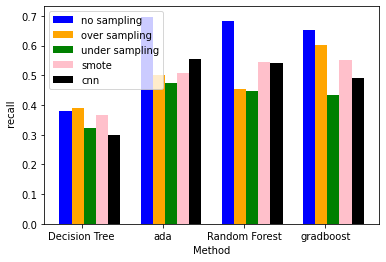

In [350]:
methods=['Decision Tree','ada','Random Forest','gradboost']
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(4)
width=0.15

plt.bar(x-0.2, recall_no_sampling, width,color='blue')
plt.bar(x-0.05, recall_over_sampling, width,color ='orange')
plt.bar(x+0.1, recall_under_sampling,width,color='green')
plt.bar(x+0.25, recall_smote_sampling, width,color='pink')
plt.bar(x+0.4, recall_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' recall')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)
plt.show()

No handles with labels found to put in legend.


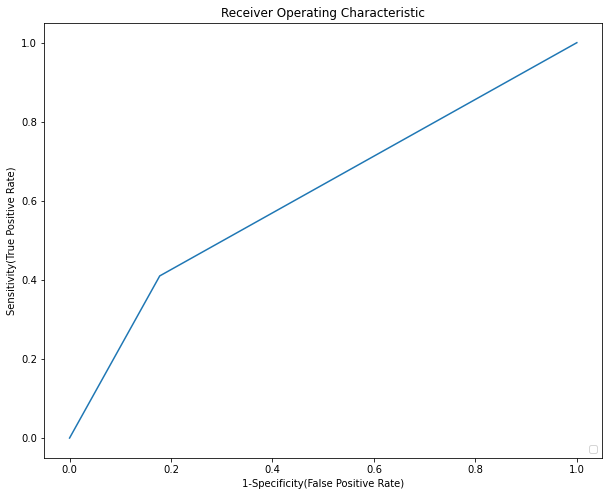

In [420]:
from sklearn import metrics
abs1=clf_nosamp.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,clf_nosamp.predict(x_test))
#roc_over_sampling
#models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Decision Tree','Ada','Random Forrest','Gradient Boosting']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(4)
#, label='%s ROC (area = %0.2f)' % (label[m], auc
plt.plot(fpr,tpr)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [393]:
from sklearn.model_selection import GridSearchCV

In [358]:
#decision tree optimise parameters _param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=clf,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(x_train,y_train)

In [359]:
best_accuracy_1 = grid_search_dt.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8200476190476191


In [362]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [363]:
y_pred_dct = grid_search_dt.predict(x_test)

In [367]:
#roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model_results =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
#model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               #columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
#model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.822,0.69246,0.350754,0.465644


In [368]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(x_train,y_train)

In [369]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.817047619047619


In [370]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 600}

In [372]:
y_pred_rf = grid_search_rf.predict(x_test)

In [374]:
y_pred_rf = grid_search_rf.predict(x_test)
#roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.822000,0.692460,0.350754,0.465644
1,Random Forest Tuned,0.819111,0.660177,0.374874,0.478205


In [376]:
y_pred_rf = grid_search_rf.predict(x_ov)

In [377]:
y_pred_rf = grid_search_rf.predict(x_ov)
#roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_ov, y_pred_rf)
prec = precision_score(y_ov, y_pred_rf)
rec = recall_score(y_ov, y_pred_rf)
f1 = f1_score(y_ov, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.822000,0.692460,0.350754,0.465644
1,Random Forest Tuned,0.819111,0.660177,0.374874,0.478205
2,Random Forest Tuned,0.999694,0.999633,0.999755,0.999694
3,Random Forest Tuned,0.999694,0.999633,0.999755,0.999694


In [384]:
param_grid_ada = {'n_estimators': [50,60,70,80,90,100,150, 200], # It is going to be a long search
              'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],}
grid_search_ada = GridSearchCV(estimator=ada,param_grid=param_grid_ada,scoring='precision',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(x_ov,y_ov)

In [385]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.9433200856007338


In [387]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 200}

In [388]:
y_pred_rf = grid_search_rf.predict(x_test)

In [390]:
y_pred_rf = grid_search_rf.predict(x_test)
#roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['ada Forest Tuned', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.822000,0.692460,0.350754,0.465644
1,Random Forest Tuned,0.819111,0.660177,0.374874,0.478205
2,Random Forest Tuned,0.999694,0.999633,0.999755,0.999694
3,Random Forest Tuned,0.999694,0.999633,0.999755,0.999694
4,Random Forest Tuned,0.810889,0.595238,0.452261,0.513992
5,ada Forest Tuned,0.810889,0.595238,0.452261,0.513992


In [391]:
param_grid_gcb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_gcb = GridSearchCV(estimator=xgb,param_grid=param_grid_gcb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_gcb = grid_search_gcb.fit(x_train,y_train)

TypeError: estimator should be an estimator implementing 'fit' method, <module 'xgboost' from 'C:\\Users\\Mollie\\Documents\\python\\lib\\site-packages\\xgboost\\__init__.py'> was passed